# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

# Read the Data

In [2]:
df = pd.read_csv('cost_revenue_dirty.csv')
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [3]:
df.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
593,5363,1/8/1991,Slacker,"$23,000","$1,227,508","$1,227,508"
2187,3580,2/27/2004,Club Dread,"$8,500,000","$7,573,551","$5,001,655"
2836,1270,12/31/2006,Les Bronzés 3: amis pour la vie,"$42,000,000","$83,833,602",$0
271,4264,4/7/1980,Airplane!,"$3,500,000","$83,453,539","$83,453,539"
2156,5365,12/31/2003,Flywheel,"$20,000",$0,$0


# Explore and Clean the Data

    How many rows and columns does the dataset contain?

    Are there any NaN values present?

    Are there any duplicate rows?

    What are the data types of the columns?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [5]:
df.shape

(5391, 6)

In [6]:
df.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

- Check is there are missing values

<AxesSubplot:>

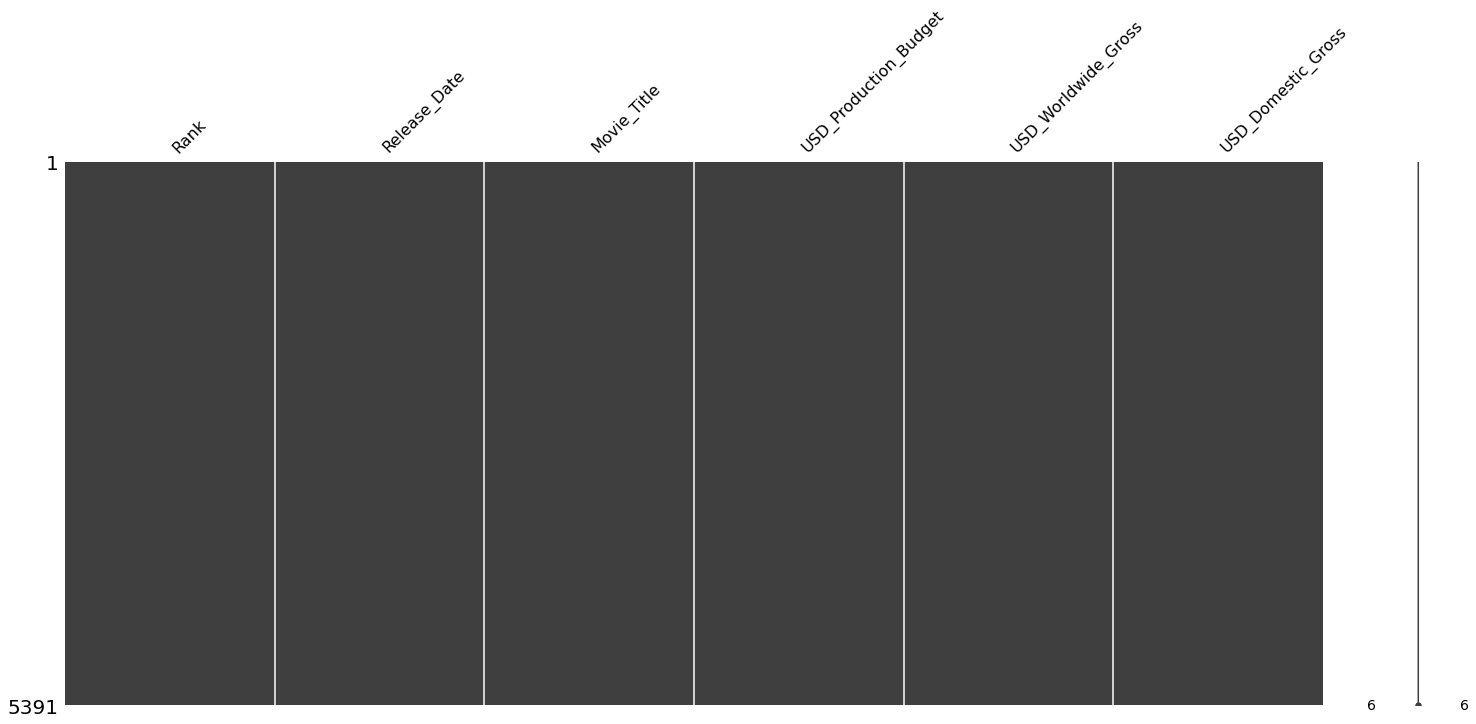

In [7]:
msno.matrix(df)

In [8]:
df.count()

Rank                     5391
Release_Date             5391
Movie_Title              5391
USD_Production_Budget    5391
USD_Worldwide_Gross      5391
USD_Domestic_Gross       5391
dtype: int64

In [9]:
df.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

- Are there duplicates? If Yes, how many?

In [10]:
df.duplicated().sum()

0

In [11]:
df[df.duplicated()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


    Convert the USD_Production_Budget, USD_Worldwide_Gross, and USD_Domestic_Gross columns to a numeric format by removing $ signs and ,.

    Note that domestic in this context refers to the United States.

In [12]:
df.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2174,815,2/4/2004,Hellboy,"$60,000,000","$99,823,958","$59,623,958"
5329,229,3/3/2017,Logan,"$127,000,000","$615,577,068","$226,277,068"
3133,1820,4/18/2008,88 Minutes,"$30,000,000","$32,955,399","$16,930,884"
4362,2366,4/1/2013,Texas Chainsaw 3D,"$20,000,000","$47,666,013","$34,341,945"
4690,5083,10/9/2014,Born to Fly: Elizabeth Streb vs. Gravity,"$500,000","$1,822","$1,822"


- Remove '$', ',' and convert to numeric

In [13]:
# df['USD_Production_Budget'] = df['USD_Production_Budget'].replace('$','')
# df['USD_Production_Budget']

0           $110,000
1           $385,907
2           $200,000
3           $100,000
4           $245,000
            ...     
5386     $15,000,000
5387    $160,000,000
5388    $175,000,000
5389     $50,000,000
5390     $20,000,000
Name: USD_Production_Budget, Length: 5391, dtype: object

In [14]:
# first_el = df.iloc[0]['USD_Production_Budget']

In [15]:
# first_el

'$110,000'

In [16]:
# type(first_el)

str

In [17]:
# first_el.replace('$','').replace(',','')

'110000'

In [18]:
# ch = ['$',',']

# for el in ch:
#     if el in first_el:
#         first_el.replace(el,'')
        
# first_el

'$110,000'

In [19]:
# def cleaning(text):
#     ch = ['$',',']
#     for el in ch:
#         if el in text:
#              text=text.replace(el,'')
#     return text


In [20]:
repl = df[['USD_Production_Budget','USD_Worldwide_Gross']]

In [33]:
for x in ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']:
    #print(df[x])
    l=[]
    for y in df[x]:
        l.append(y.replace('$','').replace(',',''))
        #print(y)
    print(l)
    l=np.array(l)
    print(l.shape)
    df[x]=pd.Series(l)

df
    

['110000', '385907', '200000', '100000', '245000', '3900000', '2000000', '379000', '4000000', '558000', '672000', '200000', '439000', '325000', '609000', '1500000', '1300000', '1200000', '1488000', '2000000', '1644000', '1500000', '2777000', '3900000', '2000000', '1288000', '2280000', '1250000', '858000', '134000', '1039000', '2627000', '2361000', '5200000', '2160000', '1250000', '1500000', '3180000', '2000000', '2100000', '6000000', '2000000', '3700000', '3000000', '1600000', '1000000', '2900000', '3768785', '8250000', '1200000', '3000000', '1800000', '2300000', '730000', '4000000', '2540000', '1250000', '4000000', '1650000', '210000', '5000000', '658000', '5000000', '910000', '5000000', '1200000', '1577000', '6000000', '4500000', '4000000', '1000000', '3380000', '13500000', '6000000', '500000', '2660000', '1200000', '5000000', '340000', '3000000', '3000000', '5000000', '3500000', '2883848', '15000000', '4000000', '3000000', '3000000', '12000000', '12000000', '4000000', '3000000', '29

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


In [35]:
df.head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [36]:
df[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']]=df[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


In [38]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [40]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB
